# Template Notebook

## Setup

### Standard library imports

In [1]:
%load_ext autoreload

In [2]:
import sys
import warnings
import logging

sys.path.append('..')
warnings.filterwarnings('ignore')
logger = logging.getLogger(__name__)

### Standard library imports

### Thrid Party libraries imports

In [3]:
import numpy as np
from matplotlib import pyplot as plt

### Modules imports

In [5]:
%autoreload 2

from source.generators import random_distribution
from source.utils import distributions

### Paths

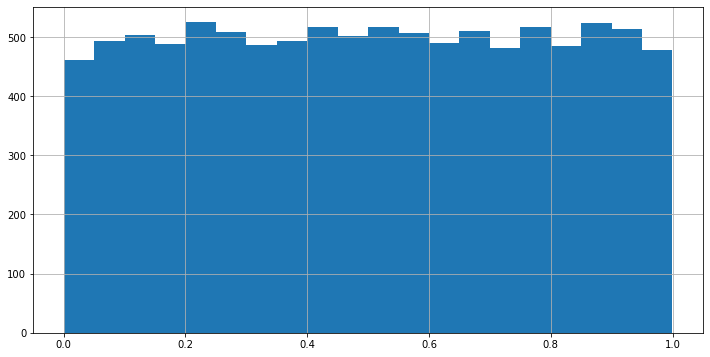

In [30]:
plt.figure(figsize=(12, 6))

plt.hist(random_distribution(10_000, 'uniform'), bins=20)

plt.grid()